In [12]:
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns


from src.preprocessing import Preprocessing
from src.visualization import Visualization
from src.experiments import Experiments

In [2]:
train = pd.read_csv('data/train_man.csv', sep = '\t')
column_target = 'hor_man'

Preprocessing.data_info(train)
# #Analisando a regressão de cada feature separadamente...
# Visualization.correlation_features(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         143 non-null    int64  
 1   distancia          143 non-null    int64  
 2   populacao          143 non-null    int64  
 3   pib                143 non-null    int64  
 4   renda              143 non-null    float64
 5   idhm               143 non-null    float64
 6   urbano             143 non-null    float64
 7   envelhecimento     143 non-null    float64
 8   esp_vida           143 non-null    float64
 9   dependencia        143 non-null    float64
 10  freq_superior      143 non-null    float64
 11  sup_completo       143 non-null    float64
 12  pop15_24           143 non-null    float64
 13  pop25_34           143 non-null    float64
 14  pop35_44           143 non-null    float64
 15  pop45_54           143 non-null    float64
 16  pop55_64           143 non

{'shape': (143, 30),
 'describe':        Unnamed: 0    distancia     populacao           pib        renda  \
 count   143.00000   143.000000  1.430000e+02  1.430000e+02   143.000000   
 mean     71.00000   448.839161  5.988950e+06  3.152888e+08  1235.852168   
 std      41.42463   239.283044  5.165966e+06  3.062804e+08   204.282761   
 min       0.00000    88.000000  4.384540e+05  1.604788e+07   723.320000   
 25%      35.50000   259.500000  1.632562e+06  6.730295e+07  1095.350000   
 50%      71.00000   428.000000  3.080943e+06  1.072350e+08  1230.110000   
 75%     106.50000   578.000000  1.231006e+07  7.012290e+08  1348.860000   
 max     142.00000  1464.000000  1.897093e+07  1.036883e+09  1778.200000   
 
              idhm      urbano  envelhecimento    esp_vida  dependencia  ...  \
 count  143.000000  143.000000      143.000000  143.000000   143.000000  ...   
 mean     0.891469   93.668601        8.059371   76.201958    40.279720  ...   
 std      0.850592    4.256755        1.1

In [3]:
train.fillna(0, inplace = True)
delete_columns = ['Unnamed: 0']

train.drop(delete_columns, axis=1, inplace=True)

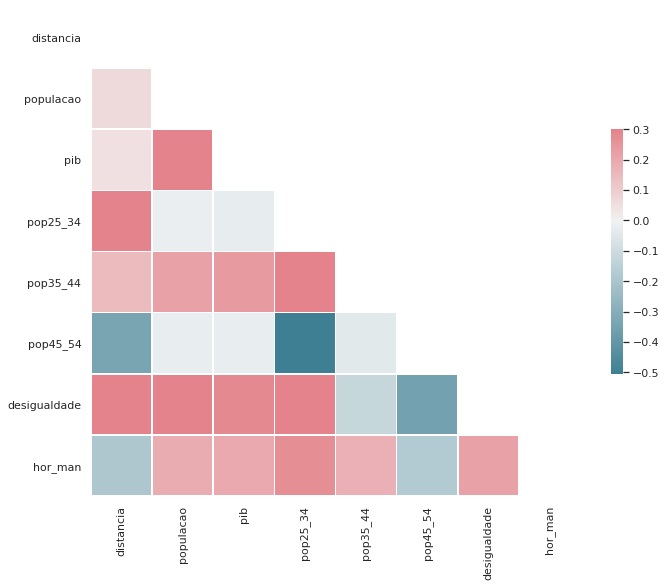

In [4]:
df_train = Preprocessing.select_features(train, column_target)
Visualization.correlation_features(df_train)

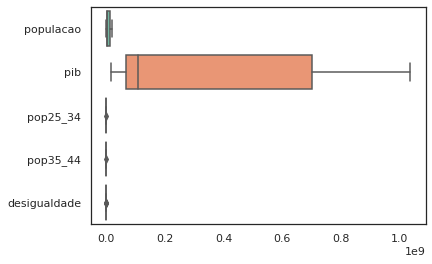

In [13]:
ax = sns.boxplot(data=df_train, orient="h", palette="Set2")

In [5]:
target = df_train[column_target]
df_train.drop([column_target, 'distancia', 'pop45_54'], axis = 1, inplace = True)



x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=25)
experiments = Experiments(x_train, y_train, x_test, y_test)

In [6]:
linear_SVR, linear_SVR_measurement  = experiments.models_correlations(LinearSVR())
linear_SVR_measurement

{'model': LinearSVR(),
 'train_time': 0.022034645080566406,
 'test_time': 0.0035409927368164062,
 'score': -0.47495504752119166,
 'explained_variance_score': 0.0,
 'max_error': 24.0,
 'mean_absolute_error': 2.97,
 'mean_squared_error': 27.31,
 'r2_score': -0.47}

In [7]:
decision_tree_regressor, decision_tree_regressor_measurement = experiments.models_correlations(DecisionTreeRegressor())
decision_tree_regressor_measurement

{'model': DecisionTreeRegressor(),
 'train_time': 0.008681535720825195,
 'test_time': 0.006582021713256836,
 'score': 0.46179039301310054,
 'explained_variance_score': 0.48,
 'max_error': 17.0,
 'mean_absolute_error': 0.59,
 'mean_squared_error': 9.97,
 'r2_score': 0.46}

In [8]:
k_neighbors_regressor, k_neighbors_regressor_measurement = experiments.models_correlations(KNeighborsRegressor())
k_neighbors_regressor_measurement

{'model': KNeighborsRegressor(),
 'train_time': 0.003398418426513672,
 'test_time': 0.0027382373809814453,
 'score': -0.018314924222964324,
 'explained_variance_score': 0.03,
 'max_error': 20.6,
 'mean_absolute_error': 2.36,
 'mean_squared_error': 18.86,
 'r2_score': -0.02}

In [9]:
random_forest_regressor, random_forest_regressor_measurement = experiments.models_correlations(RandomForestRegressor())
random_forest_regressor_measurement

{'model': RandomForestRegressor(),
 'train_time': 0.15338921546936035,
 'test_time': 0.006292104721069336,
 'score': 0.8316415168250707,
 'explained_variance_score': 0.84,
 'max_error': 9.5,
 'mean_absolute_error': 0.35,
 'mean_squared_error': 3.12,
 'r2_score': 0.83}

In [10]:
mlp_regressor, mlp_regressor_measurement = experiments.models_correlations(MLPRegressor())
mlp_regressor_measurement

{'model': MLPRegressor(),
 'train_time': 0.20933818817138672,
 'test_time': 0.002632617950439453,
 'score': -102173469824.50482,
 'explained_variance_score': -46302362193.77,
 'max_error': 2236165.21,
 'mean_absolute_error': 1017109.8,
 'mean_squared_error': 1891849312868.92,
 'r2_score': -102173469824.5}